In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.sample(5)

,Class label,Alcohol,Malic acid
49,1,13.94,1.73
85,2,12.67,0.98
156,3,13.84,4.12
60,2,12.33,1.10
74,2,11.96,1.09


# B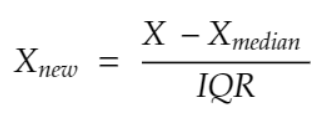efore Scaling the data

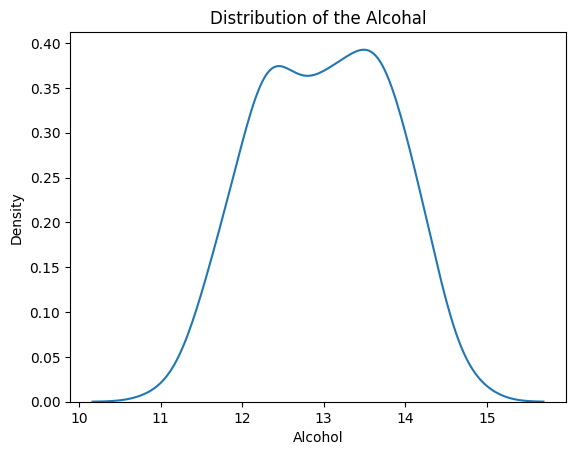

In [13]:
plt.title("Distribution of the Alcohal")
sns.kdeplot(df['Alcohol'])
plt.show()

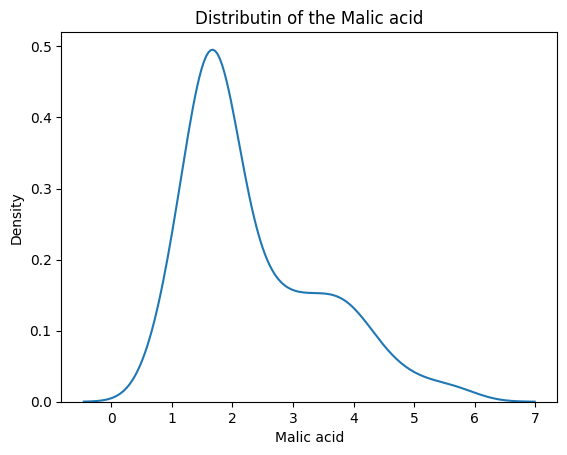

In [15]:
plt.title("Distributin of the Malic acid")
sns.kdeplot(df['Malic acid'])
plt.show()

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

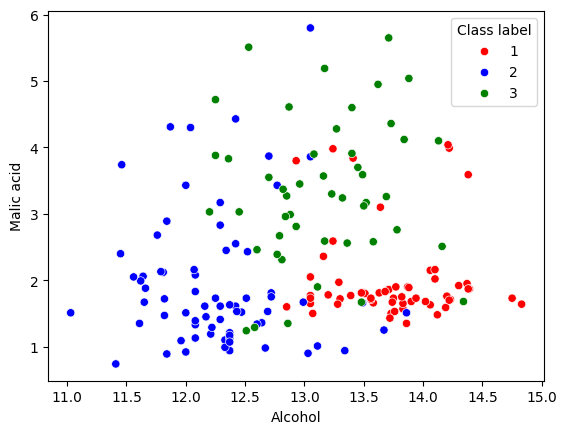

In [23]:
# crtete the color paalate according to classs
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((124, 2), (54, 2))

# 2.Min mAx Scaling
# @To check if the data is tranformed or not just check min value =0 and max value = 1



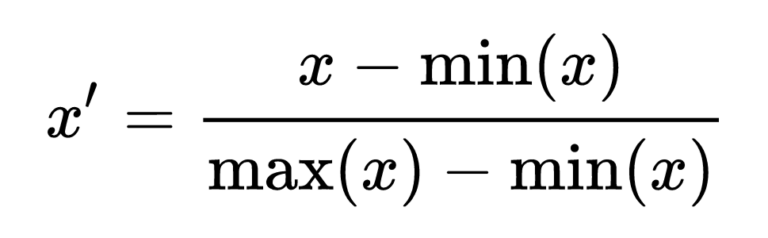

In [32]:
# it convert the all the values between 0 to 1
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [34]:
ms.fit(X_train) #fiiting the data into the MinMax scaling model

# now tranform the data by the min max transformation
X_train_scaled=ms.transform(X_train)
X_test_scaled=ms.transform(X_test)

#now convsr the array into the data frame
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [40]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


## Now plot the Before and after the scaling

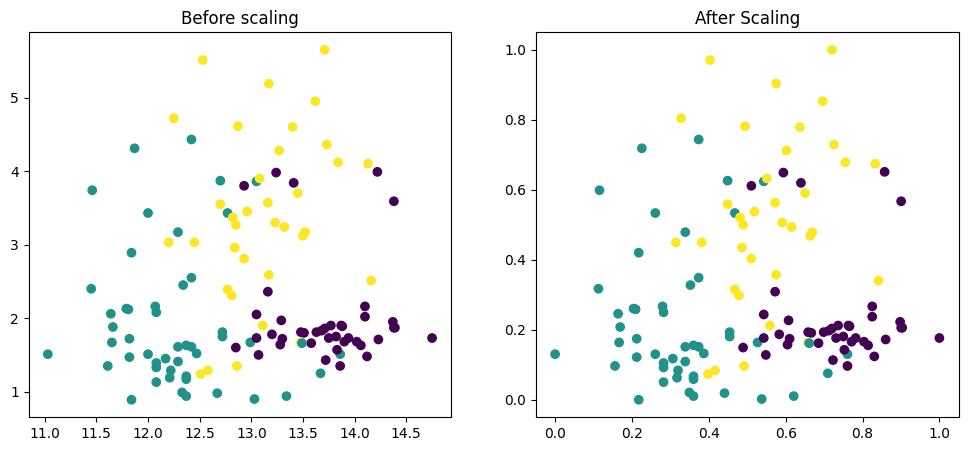

In [44]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before scaling")
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'], c=y_train)

ax2.set_title("After Scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic acid'],c=y_train)
plt.show()

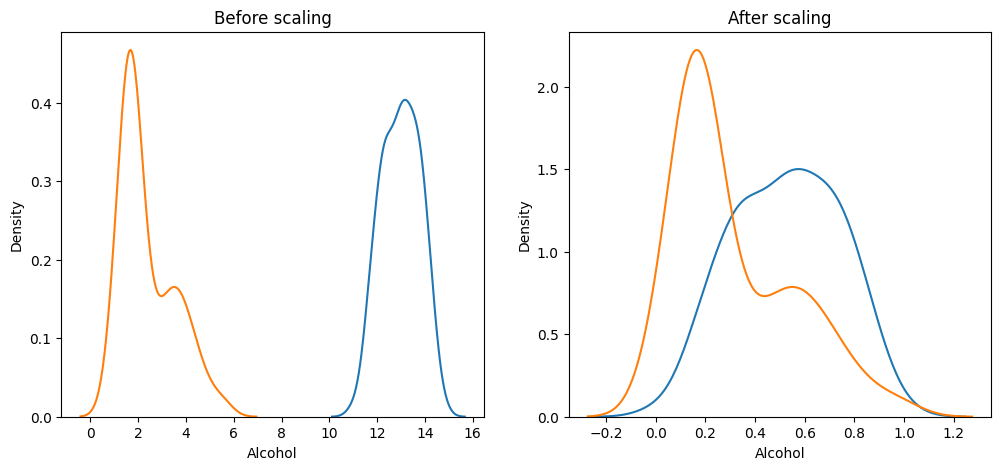

In [45]:
# Now plot the Ditribution plot
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title("Before scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title("After scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)
plt.show()

# Observation as we can see that the scale is **balanced** now

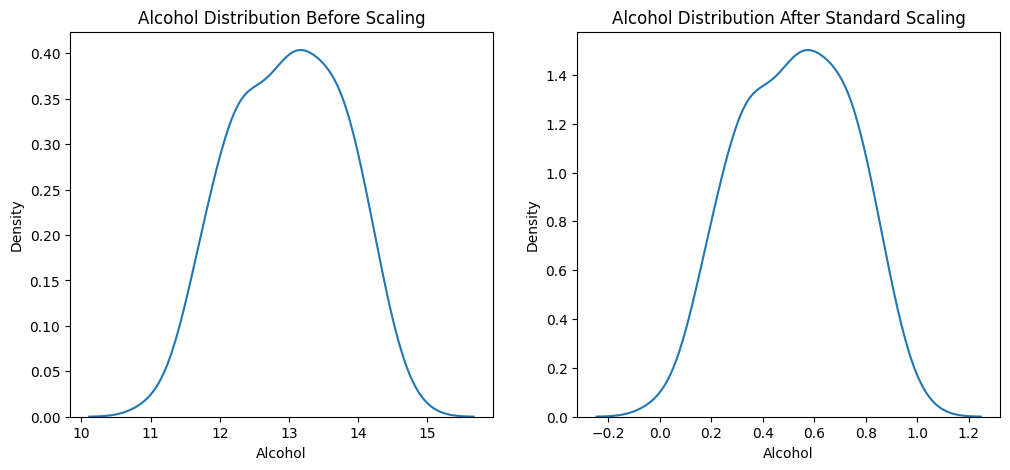

In [47]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
plt.show()

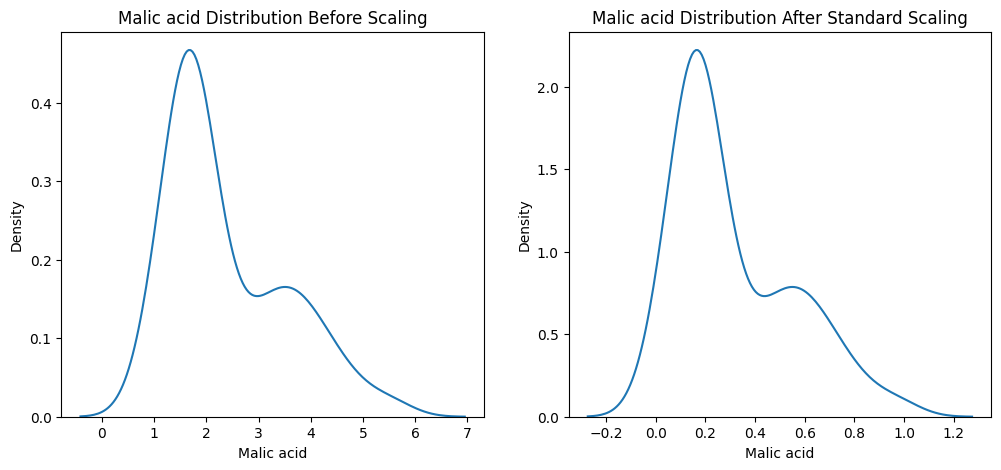

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Malic acid Distribution Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('Malic acid Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

# **Robust Scaling**

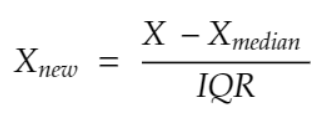

## Robust scaling is used to deal with the outliers

In [48]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()

In [50]:
rb.fit(X_train)
scaled_rb_X_train=rb.transform(X_train)
scaled_rb_X_test=rb.transform(X_test)

In [51]:
# now convert it into the datafdrame
scaled_rb_X_train= pd.DataFrame(scaled_rb_X_train,columns=X_train.columns)
scaled_rb_X_test= pd.DataFrame(scaled_rb_X_test,columns=X_test.columns)

In [54]:
np.round(scaled_rb_X_train.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,-0.04,0.30
std,0.63,0.69
min,-1.57,-0.61
25%,-0.53,-0.17
50%,0.00,0.00
75%,0.47,0.83
max,1.34,2.30


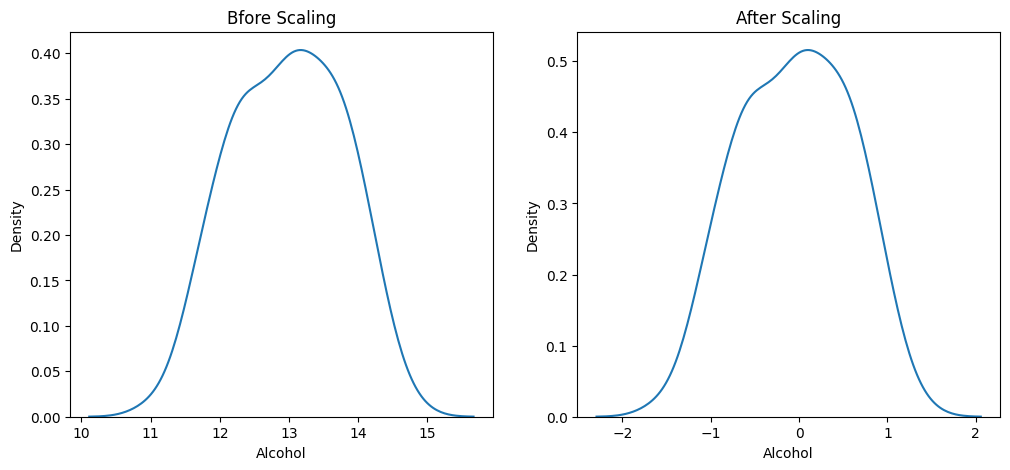

In [56]:
# now plating the Kde plot to see the ditribution
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Bfore Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(scaled_rb_X_train['Alcohol'])

plt.show()

# scale only reduced the distribution is same

In [ ]:
|